HOUSE PRICE PREDICTION

IMPORTING REQUIRED LIBRARIES


In [ ]:
import xgboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split,KFold,RepeatedKFold,StratifiedKFold,cross_val_score

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.feature_selection import RFECV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer

In [ ]:
pd.options.display.max_columns = None

UPLOADING TRAIN DATA

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
df1 = pd.read_csv("train.csv")


df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_num = df1.select_dtypes(np.number)
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
df_num.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df_cat = df1.select_dtypes(np.object)
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
df_num.isnull().sum()[df_num.isnull().sum() > 0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

2.163569142324884


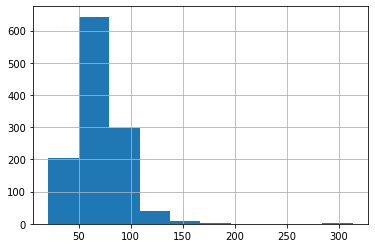

In [ ]:
print(df1['LotFrontage'].skew())
df1['LotFrontage'].hist()

In [ ]:
df1['LotFrontage'].fillna(0,inplace=True)

2.669084210182863


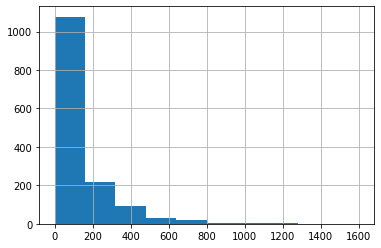

In [ ]:
print(df1['MasVnrArea'].skew())
df1['MasVnrArea'].hist()

In [ ]:
df1['MasVnrArea'].fillna(0,inplace=True)

In [ ]:
df1['GarageYrBlt'].fillna(0,inplace=True)

In [ ]:
df_num = df1.select_dtypes(np.number)

In [ ]:
df_cat.isnull().sum()[df_cat.isnull().sum() > 0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
for col in df_cat.columns:
    df1[col].fillna('None',inplace=True)

In [ ]:
df_cat.isnull().sum()[df_cat.isnull().sum() > 0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving test.csv to test.csv


READING TEST DATASET


In [ ]:
df2 = pd.read_csv("test.csv")
df2.shape

(1459, 80)

In [ ]:
df2.isnull().sum()[df2.isnull().sum() > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [ ]:
df2_num = df2.select_dtypes(np.number)
df2_num.isnull().sum()[df2_num.isnull().sum() > 0]

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [ ]:
for col in df2_num.columns:
    df2[col].fillna(0,inplace=True)

In [ ]:
df2_cat = df2.select_dtypes(np.object)
df2_cat.isnull().sum()[df2_cat.isnull().sum() > 0]

MSZoning           4
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageFinish      78
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [ ]:
for col in df2_cat.columns:
    df2[col].fillna('None',inplace=True)

In [ ]:
df2.isnull().sum()[df2.isnull().sum()>0]

Series([], dtype: int64)

Nulls replaced in both training and testing dataset


### OUTLIERS:

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38]), <a list of 38 Text major ticklabel objects>)

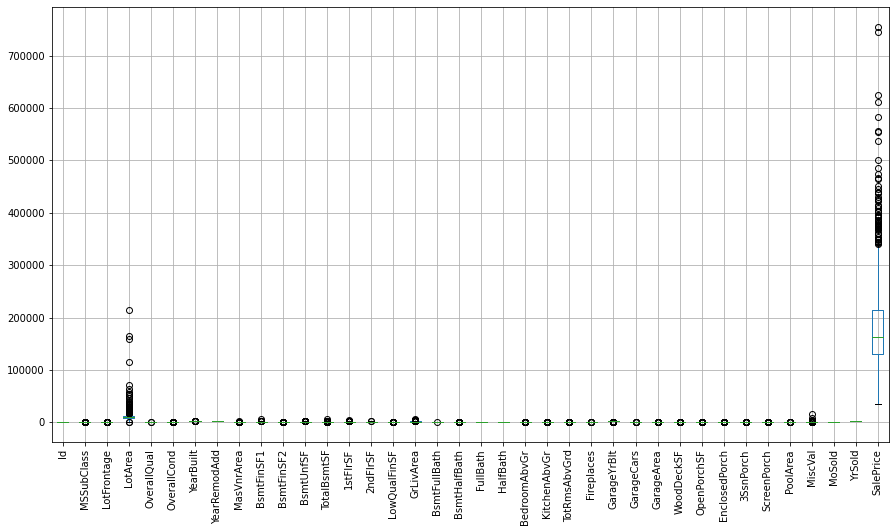

In [ ]:
plt.figure(figsize= (15,8))
df1.boxplot()
plt.xticks(rotation=90)

In [ ]:
df1_out = df1.copy()

q1 = df1.quantile(0.25)

q3 = df1.quantile(0.75)

iqr = q3-q1

upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)

df1_out = df1[((df1 > upper) | (df1 < lower)).any(axis=1)]

print("No of rows in outliers: ",df1_out.shape[0])

No of rows in outliers:  911


from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
col = df1.select_dtypes(np.number).columns
df3[col] = rs.fit_transform(df3[col])

In [ ]:
df_num.skew()[df_num.skew()>1]

MSSubClass        1.407657
LotArea          12.207688
MasVnrArea        2.677616
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
TotalBsmtSF       1.524255
1stFlrSF          1.376757
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtHalfBath      4.103403
KitchenAbvGr      4.488397
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
SalePrice         1.882876
dtype: float64

In [ ]:
df_num.skew()[df_num.skew()<1]

Id              0.000000
LotFrontage     0.267822
OverallQual     0.216944
OverallCond     0.693067
YearBuilt      -0.613461
YearRemodAdd   -0.503562
BsmtUnfSF       0.920268
2ndFlrSF        0.813030
BsmtFullBath    0.596067
FullBath        0.036562
HalfBath        0.675897
BedroomAbvGr    0.211790
TotRmsAbvGrd    0.676341
Fireplaces      0.649565
GarageYrBlt    -3.869501
GarageCars     -0.342549
GarageArea      0.179981
MoSold          0.212053
YrSold          0.096269
dtype: float64

# ### PIPELINE

In [ ]:
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000


In [ ]:
y = df1['SalePrice']
X = df1.iloc[:,1:]
X.drop('SalePrice',axis=1,inplace=True)


In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.3)

In [ ]:
ytrain = np.log1p(ytrain)
ytest = np.log1p(ytest)

In [ ]:
cat_col = [col for col in xtrain.select_dtypes(np.object).columns if (xtrain[col].nunique() <15)]

num_col = [col for col in xtrain.select_dtypes(np.number).columns]



In [ ]:
xtrain = xtrain[cat_col + num_col]

In [ ]:
skewed_cols = xtrain.skew()[xtrain.skew() > 0.75].index

In [ ]:
skewed_cols = skewed_cols.to_list()

In [ ]:
from sklearn import set_config

In [ ]:
set_config('diagram')

In [ ]:
cat_transf = Pipeline(steps = [('encoder',OneHotEncoder(handle_unknown= 'ignore'))])

display(cat_transf)

Pipeline(memory=None,
         steps=[('encoder',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=True))],
         verbose=False)

In [ ]:
num_transf = Pipeline(steps = [('Col_transf',
                                ColumnTransformer(
                                            transformers=[
                                                      ('Log_Transf:np.log1p',FunctionTransformer(func = np.log1p),skewed_cols)]
                                                   ,remainder= 'passthrough')),
                              ('KNNImputer', KNNImputer(n_neighbors=2, add_indicator=False))])

display(num_transf)

Pipeline(memory=None,
         steps=[('Col_transf',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('Log_Transf:np.log1p',
                                                  FunctionTransformer(accept_sparse=False,
                                                                      check_inverse=True,
                                                                      func=<ufunc 'log1p'>,
                                                                      inv_kw_args=None,
                                                                      inverse_func=None,
                                                                      kw_args=None,
                                                                      validate=False),
                                                  ['MSSubClass

In [ ]:
pp = ColumnTransformer(transformers=[('Col_transf_log',num_transf,num_col),('Categ_transf',cat_transf,cat_col)])
display(pp)
                      
                      
                    

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('Col_transf_log',
                                 Pipeline(memory=None,
                                          steps=[('Col_transf',
                                                  ColumnTransformer(n_jobs=None,
                                                                    remainder='passthrough',
                                                                    sparse_threshold=0.3,
                                                                    transformer_weights=None,
                                                                    transformers=[('Log_Transf:np.log1p',
                                                                                   FunctionTransformer(accept_sparse=False,
                                                                                                       check_...
              

In [ ]:
def get_rmse(pipe,x,y):
    
    score = cross_val_score(pipe,x,y,scoring = 'neg_mean_squared_error',cv = 2)
    rmse = np.sqrt(-(np.mean(score)))
    return rmse
    
    

# BASE MODELS


In [ ]:
pipe = Pipeline(steps = [('pre-process',pp),('model',Ridge())])

rmse1 = get_rmse(pipe,xtrain,ytrain)

print("Train RMSE: ",rmse1)
                
                   
rmse2 = get_rmse(pipe,xtest,ytest)
print("Test RMSE: ",rmse2)


Train RMSE:  0.15022990451274407
Test RMSE:  0.1547386990214504


In [ ]:
results = pd.DataFrame({},columns =['Model','Train_RMSE','Test_RMSE'])
results= results.append({'Model': 'Ridge','Train_RMSE':rmse1,'Test_RMSE':rmse2},ignore_index=True)
results  

,Model,Train_RMSE,Test_RMSE
0,Ridge,0.15023,0.154739


In [ ]:
pipe = Pipeline(steps = [('pre-process',pp),('model',Lasso())])

rmse1 = get_rmse(pipe,xtrain,ytrain)

print("Train RMSE: ",rmse1)
                
                   
rmse2 = get_rmse(pipe,xtest,ytest)
print("Test RMSE: ",rmse2)
results= results.append({'Model': 'Lasso','Train_RMSE':rmse1,'Test_RMSE':rmse2},ignore_index=True)
results  


Train RMSE:  0.2715274312455335
Test RMSE:  0.2607072075290216


,Model,Train_RMSE,Test_RMSE
0,Ridge,0.150230,0.154739
1,Lasso,0.271527,0.260707


In [ ]:
pipe = Pipeline(steps = [('pre-process',pp),('model',LinearRegression())])

rmse1 = get_rmse(pipe,xtrain,ytrain)

print("Train RMSE: ",rmse1)
                
                   
rmse2 = get_rmse(pipe,xtest,ytest)
print("Test RMSE: ",rmse2)
results= results.append({'Model': 'LinearRegression','Train_RMSE':rmse1,'Test_RMSE':rmse2},ignore_index=True)
results  


Train RMSE:  0.1761242182512439
Test RMSE:  0.4277303203660705


,Model,Train_RMSE,Test_RMSE
0,Ridge,0.150230,0.154739
1,Lasso,0.271527,0.260707
2,LinearRegression,0.176124,0.427730


In [ ]:
pipe = Pipeline(steps = [('pre-process',pp),('model',DecisionTreeRegressor())])

rmse1 = get_rmse(pipe,xtrain,ytrain)

print("Train RMSE: ",rmse1)
                
                   
rmse2 = get_rmse(pipe,xtest,ytest)
print("Test RMSE: ",rmse2)
results= results.append({'Model': 'DTReg','Train_RMSE':rmse1,'Test_RMSE':rmse2},ignore_index=True)
results  


Train RMSE:  0.23713205986589472
Test RMSE:  0.23492050991349983


,Model,Train_RMSE,Test_RMSE
0,Ridge,0.150230,0.154739
1,Lasso,0.271527,0.260707
2,LinearRegression,0.176124,0.427730
3,DTReg,0.237132,0.234921


In [ ]:
pipe = Pipeline(steps = [('pre-process',pp),('model',RandomForestRegressor())])

rmse1 = get_rmse(pipe,xtrain,ytrain)

print("Train RMSE: ",rmse1)
                
                   
rmse2 = get_rmse(pipe,xtest,ytest)
print("Test RMSE: ",rmse2)
results= results.append({'Model': 'RF-reg','Train_RMSE':rmse1,'Test_RMSE':rmse2},ignore_index=True)
results  


Train RMSE:  0.16139683328750506
Test RMSE:  0.1521369464122849


,Model,Train_RMSE,Test_RMSE
0,Ridge,0.150230,0.154739
1,Lasso,0.271527,0.260707
2,LinearRegression,0.176124,0.427730
3,DTReg,0.237132,0.234921
4,RF-reg,0.161397,0.152137


In [ ]:
pipe = Pipeline(steps = [('pre-process',pp),('model',GradientBoostingRegressor())])

rmse1 = get_rmse(pipe,xtrain,ytrain)

print("Train RMSE: ",rmse1)
                
                   
rmse2 = get_rmse(pipe,xtest,ytest)
print("Test RMSE: ",rmse2)
results= results.append({'Model': 'GB-reg','Train_RMSE':rmse1,'Test_RMSE':rmse2},ignore_index=True)
results 

Train RMSE:  0.14982103229964522
Test RMSE:  0.14719753350144243


,Model,Train_RMSE,Test_RMSE
0,Ridge,0.150230,0.154739
1,Lasso,0.271527,0.260707
2,LinearRegression,0.176124,0.427730
3,DTReg,0.237132,0.234921
4,RF-reg,0.161397,0.152137
5,GB-reg,0.149821,0.147198


In [ ]:
pipe = Pipeline(steps = [('pre-process',pp),('model',AdaBoostRegressor())])

rmse1 = get_rmse(pipe,xtrain,ytrain)

print("Train RMSE: ",rmse1)
                
                   
rmse2 = get_rmse(pipe,xtest,ytest)
print("Test RMSE: ",rmse2)
results= results.append({'Model': 'AdaBoost-reg','Train_RMSE':rmse1,'Test_RMSE':rmse2},ignore_index=True)
results 

Train RMSE:  0.18431097988656767
Test RMSE:  0.167225887813432


,Model,Train_RMSE,Test_RMSE
0,Ridge,0.150230,0.154739
1,Lasso,0.271527,0.260707
2,LinearRegression,0.176124,0.427730
3,DTReg,0.237132,0.234921
4,RF-reg,0.161397,0.152137
5,GB-reg,0.149821,0.147198
6,AdaBoost-reg,0.184311,0.167226


## XGBoost

In [ ]:
import xgboost

from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor()

pipe = Pipeline([('pre-process',pp) , ('model',model)])

pipe.fit(xtrain,ytrain)

rmse1 = get_rmse(pipe1,xtrain,ytrain)

print(rmse1)


[16:40:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.15110845224162772


In [ ]:
rmse2 = get_rmse(pipe1,xtest,ytest)

print(rmse2)

0.15289368387898114


In [ ]:
results= results.append({'Model': 'XGBoost','Train_RMSE':rmse1,'Test_RMSE':rmse2},ignore_index=True)
results 

,Model,Train_RMSE,Test_RMSE
0,Ridge,0.150230,0.154739
1,Lasso,0.271527,0.260707
2,LinearRegression,0.176124,0.427730
3,DTReg,0.237132,0.234921
4,RF-reg,0.161397,0.152137
5,GB-reg,0.149821,0.147198
6,AdaBoost-reg,0.184311,0.167226
7,XGBoost,0.151108,0.152894


# BASE MODEL PERFORMANCE SUMMARY

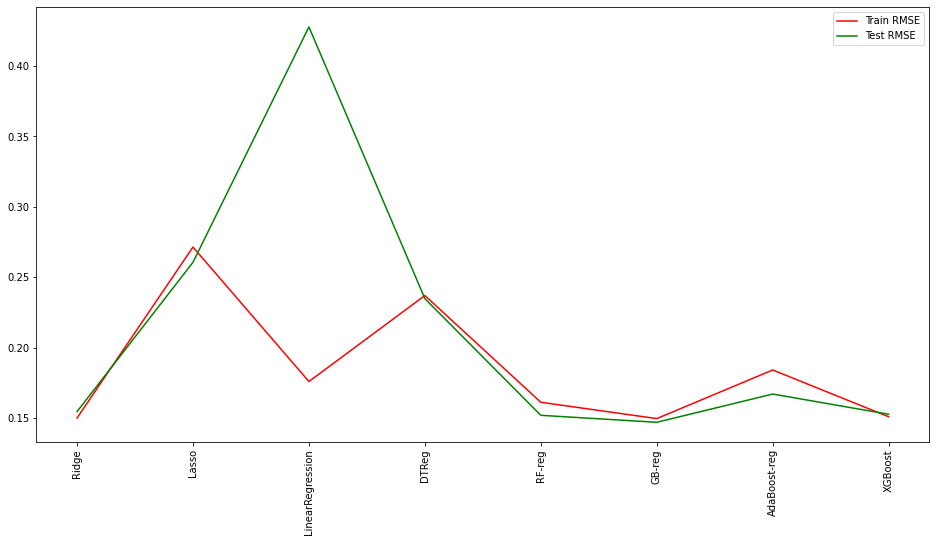

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(results['Train_RMSE'],'r-',label = 'Train RMSE')
plt.xticks([0,1,2,3,4,5,6,7],labels = results['Model'])
plt.plot(results['Test_RMSE'],'g-',label = 'Test RMSE')
plt.xticks(rotation = 90)
plt.legend()

### We can see that Test RMSE is higher than Train RMSE values. Clearly, the basemodels are depicting OVERFITTING (low bias and high variance).
### Lasso is depicting high bias with low variance.
### Linear Regression is depicting moderate bias with high variance.
### Gradient Boost Regressor is demonstrating low bias with moderate variance
### XBGoost is providing near to ideal performance of low bias and low variance comparitivelu

# HYPERTUNING

### Hypertuning:RF regressor,GB regressor, Ridge Regressor and XGBoost

### RANDOM FOREST:

In [ ]:
### RANDOM FOREST REGRESSOR:

model = RandomForestRegressor()

params = {'max_depth':[5,6,7],'n_estimators':[50,60,70]}

#grid = GridSearchCV(estimator= model,param_grid= params,cv =3)

random_search = RandomizedSearchCV(estimator= model,param_distributions= params,cv =5,random_state= 111)

pipe1 = Pipeline([('pre-process',pp) , ('random_search',random_search)])

pipe1.fit(xtrain,ytrain)

rmse1 = get_rmse(pipe1,xtrain,ytrain)

print(rmse1)

0.16607241578213008


In [ ]:
random_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rmse2 = get_rmse(pipe1,xtest,ytest)

print(rmse2)

0.15796823081655104


In [ ]:
### RIDGE REGRESSOR:
model = Ridge()

params = {'alpha':np.arange(0.01,10,0.01)}

#grid = GridSearchCV(estimator= model,param_grid= params,cv =3)

random_search = RandomizedSearchCV(estimator= model,param_distributions= params,cv =5,random_state= 111)

pipe1 = Pipeline([('pre-process',pp) , ('random_search',random_search)])

pipe1.fit(xtrain,ytrain)

rmse1 = get_rmse(pipe1,xtrain,ytrain)

print(rmse1)
random_search.best_estimator_
rmse2 = get_rmse(pipe1,xtest,ytest)

print(rmse2)

0.14723522540057257


In [ ]:
random_search.best_estimator_

Ridge(alpha=8.26, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
rmse2 = get_rmse(pipe1,xtest,ytest)

print(rmse2)

0.14386947590910099


In [ ]:
HT_results = HT_results.append({'Model':'Ridge_regressor (alpha = 9.24)','Train_RMSE_HT':rmse1,'Test_RMSE_HT':rmse2},ignore_index = True)

In [ ]:
HT_results

,Model,Train_RMSE_HT,Test_RMSE_HT
0,RF_regressor,0.166072,0.157968
1,Ridge_regressor (alpha = 9.24),0.147235,0.143869


In [ ]:
### GB Regressor:

model = GradientBoostingRegressor()

params = {'learning_rate':np.arange(0.01,1,0.01),'n_estimators':[200,250,300,350]}

#grid = GridSearchCV(estimator= model,param_grid= params,cv =3)

random_search = RandomizedSearchCV(estimator= model,param_distributions= params,cv =5,random_state= 111)

pipe1 = Pipeline([('pre-process',pp) , ('random_search',random_search)])

pipe1.fit(xtrain,ytrain)

rmse1 = get_rmse(pipe1,xtrain,ytrain)

print(rmse1)


0.1511360775947918


In [ ]:
random_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.17, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=350,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
rmse2 = get_rmse(pipe1,xtest,ytest)

print(rmse2)

0.15344482129024747


In [ ]:
HT_results = HT_results.append({'Model':'Gradient Boosting','Train_RMSE_HT':rmse1,'Test_RMSE_HT':rmse2},ignore_index = True)



In [ ]:
HT_results

,Model,Train_RMSE_HT,Test_RMSE_HT
0,RF_regressor,0.166072,0.157968
1,Ridge_regressor (alpha = 9.24),0.147235,0.143869
2,Gradient Boosting,0.151136,0.153298


In [ ]:
HT_results.drop(index=[3],inplace=True)

In [ ]:
HT_results

,Model,Train_RMSE_HT,Test_RMSE_HT
0,RF_regressor,0.166072,0.157968
1,Ridge_regressor (alpha = 9.24),0.147235,0.143869
2,Gradient Boosting,0.151136,0.153298


In [ ]:
train_rmse = pd.Series(results.iloc[[4,0,5],1])
train_rmse.index = [0,1,2]

## Finalising Ridge Regressor for prediction on test data

In [ ]:
ridge = Ridge(alpha= 9.24)

pipe_final = Pipeline(steps = [('pre-process',pp),('model',ridge)])

pipe_final.fit(xtrain,ytrain)

ypred = np.expm1(pipe_final.predict(df2))
submission = pd.DataFrame({'Id': df2['Id'],
                       'SalePrice': ypred})
display(submission.head())
submission.to_csv('submission.csv', index=False)




In [ ]:
submission = pd.DataFrame({'Id': df2['Id'],
                       'SalePrice': ypred})
display(submission.head())
submission.to_csv('submission.csv', index=False)

,Id,SalePrice
0,1461,112266.278720
1,1462,149503.004515
2,1463,175908.308135
3,1464,193488.641585
4,1465,198932.902426


In [ ]:
df2.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,None,None,0.0,None,0.0,0.0,None,None,Y,0,0,0,0,0,0,None,None,None,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,None,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,None,None,None,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,None,None,None,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,None,None,0.0,None,0.0,0.0,None,None,Y,80,32,0,0,0,0,None,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,None,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,None,None,None,0,11,2006,WD,Normal


In [ ]:
submission.tail()

,Id,SalePrice
1454,2915,82944.036426
1455,2916,82050.880097
1456,2917,162844.580570
1457,2918,117712.324588
1458,2919,234783.792361


In [ ]:
submission.index

RangeIndex(start=0, stop=1459, step=1)

In [ ]:
submission.iloc[1458]

Id             2919.000000
SalePrice    234783.792361
Name: 1458, dtype: float64

# ATTEMPT 2

# # HYPERTUNING USING HYPOPT

#RANDOM FOREST

In [ ]:
import hyperopt
from hyperopt import fmin,tpe,hp,Trials

In [ ]:
rf = RandomForestRegressor()

In [ ]:
trials = Trials()

space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600]),
    "max_depth": hp.quniform("max_depth", 1, 15,1)}


def tuning_hp(params, preprocessor=pp, X_train=xtrain, y_train=ytrain, random_state=123):
    
    #params = {"n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500,600]),
    #"max_depth": hp.quniform("max_depth", 1, 15,1)}

    model = RandomForestRegressor(**params)    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    return get_rmse(pipe, xtrain, ytrain)



best = fmin(
    fn=tuning_hp,
    space = space, 
    algo=tpe.suggest, 
    max_evals=100, 
    trials=trials)


print(best)


100%|██████████| 100/100 [09:23<00:00,  5.64s/it, best loss: 0.15947205760720032]
{'max_depth': 12.0, 'n_estimators': 0}


In [ ]:
rmse1 = trials.average_best_error()

In [ ]:
HT_results = pd.DataFrame(columns = ['Model','Train_RMSE_HT'])

HT_results = HT_results.append({'Model':'RF_regressor','Train_RMSE_HT':0.1594},ignore_index = True)
HT_results

,Model,Train_RMSE_HT
0,RF_regressor,0.1594


# GB REGRESSOR:

In [ ]:
trials = Trials()

space = {'n_estimators': hp.quniform('n_estimators', 100, 2000, 10),
    'max_depth' : hp.quniform('max_depth', 2, 20, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0)}


def tuning_hp(params, preprocessor=pp, X_train=xtrain, y_train=ytrain, random_state=123):
    
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
              'learning_rate': params['learning_rate']}


    model = GradientBoostingRegressor(**params)    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    return get_rmse(pipe, xtrain, ytrain)



best = fmin(
    fn=tuning_hp,
    space = space, 
    algo=tpe.suggest, 
    max_evals=50, 
    trials=trials)


print(best)

100%|██████████| 50/50 [05:43<00:00,  6.87s/it, best loss: 0.147318701934765]
{'learning_rate': 0.04342555169878243, 'max_depth': 3.0, 'n_estimators': 450.0}


In [ ]:
rmse1 = trials.average_best_error()
rmse1

0.147318701934765

In [ ]:

HT_results = HT_results.append({'Model':'GB_regressor','Train_RMSE_HT':0.1473},ignore_index = True)
HT_results

,Model,Train_RMSE_HT
0,RF_regressor,0.1594
1,GB_regressor,0.1473


# RIDGE REGRESSOR:

In [ ]:
model = Ridge()

params = {'alpha':np.arange(0.01,10,0.01)}

#grid = GridSearchCV(estimator= model,param_grid= params,cv =3)

random_search = RandomizedSearchCV(estimator= model,param_distributions= params,cv =5,random_state= 111)

pipe1 = Pipeline([('pre-process',pp) , ('random_search',random_search)])

pipe1.fit(xtrain,ytrain)

rmse1 = get_rmse(pipe1,xtrain,ytrain)

print(rmse1)
random_search.best_estimator_
rmse2 = get_rmse(pipe1,xtest,ytest)

print(rmse2)

0.14723522540057257
0.14386947590910099


In [ ]:
random_search.best_params_

{'alpha': 8.26}

In [ ]:
HT_results = HT_results.append({'Model':'Ridge(alpha=8.26)','Train_RMSE_HT':rmse1},ignore_index = True)


# XGBOOST

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
trials = Trials()

space = {'n_estimators': hp.quniform('n_estimators', 100, 2000, 10),
    'max_depth' : hp.quniform('max_depth', 2, 20, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0)}


def tuning_hp(params, preprocessor=pp, X_train=xtrain, y_train=ytrain, random_state=123):
    
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
              'learning_rate': params['learning_rate']}


    model = XGBRegressor(**params)    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    return get_rmse(pipe, xtrain, ytrain)



best = fmin(
    fn=tuning_hp,
    space = space, 
    algo=tpe.suggest, 
    max_evals=50, 
    trials=trials)
print(best)

[18:14:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:14:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:14:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:14:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:14:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:14:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:14:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:14:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
rmse1 = trials.average_best_error()
rmse1

0.14562937894821076

In [ ]:
HT_results.drop(index = [3],inplace=True)

In [ ]:
HT_results = HT_results.append({'Model':'XGB_regressor','Train_RMSE_HT':rmse1},ignore_index = True)


# HYPERTUNING SUMMARY

In [ ]:
HT_results

,Model,Train_RMSE_HT
0,RF_regressor,0.159400
1,GB_regressor,0.147300
2,Ridge(alpha=8.26),0.147235
3,XGB_regressor,0.145629


In [ ]:
results

,Model,Train_RMSE,Test_RMSE
0,Ridge,0.150230,0.154739
1,Lasso,0.271527,0.260707
2,LinearRegression,0.176124,0.427730
3,DTReg,0.237132,0.234921
4,RF-reg,0.161397,0.152137
5,GB-reg,0.149821,0.147198
6,AdaBoost-reg,0.184311,0.167226
7,XGBoost,0.151108,0.152894


In [ ]:
train_rmse = results.iloc[[4,5,7,0],1]
train_rmse.index = [0,1,2,3]

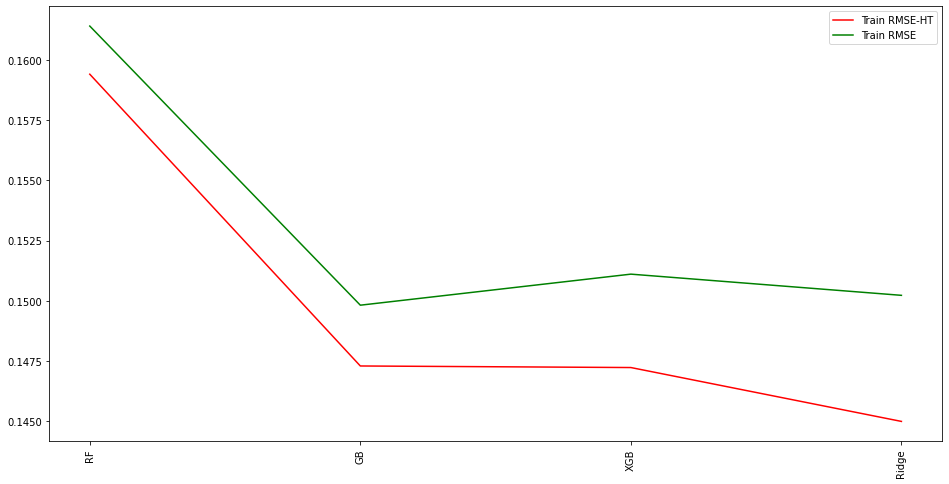

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(HT_results['Train_RMSE_HT'],'r-',label = 'Train RMSE-HT')
plt.xticks([0,1,2,3],labels = ['RF','GB','XGB','Ridge'])
plt.plot(train_rmse,'g-',label = 'Train RMSE')
plt.xticks(rotation = 90)
plt.legend()

# Stacking Regressors

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
ridge_pipe = Pipeline(steps=[
    ('preprocessor', pp),
    ('Ridge',Ridge(alpha=8.26))
])

gb_pipe = Pipeline(steps=[
    ('preprocessor', pp),
    ('GB', GradientBoostingRegressor(learning_rate= 0.04342555169878243,max_depth=3,n_estimators= 450))
])

xgb_pipe = Pipeline(steps=[
    ('preprocessor', pp),
    ('XGBRegressor', XGBRegressor(learning_rate= 0.03134124566498424,max_depth=3,n_estimators= 1020))
])

est = [
    ('Ridge', ridge_pipe),
    ('GB', gb_pipe),
    ('XGB', xgb_pipe),
]

In [ ]:
ridge = Ridge()

In [ ]:
stacked_model= StackingRegressor(estimators=est, final_estimator=Ridge(alpha = 0.001))
#display(stacked_model)

In [ ]:
rmse1 = get_rmse(stacked_model,xtrain,ytrain)

print(rmse1)

[19:12:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:12:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:12:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:13:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:13:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:13:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:13:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:13:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

# HYPERTUNING PERFORMANCE SUMMARY

In [ ]:
HT_results = HT_results.append({'Model':'Stacked_regressor','Train_RMSE_HT':0.139},ignore_index= True)

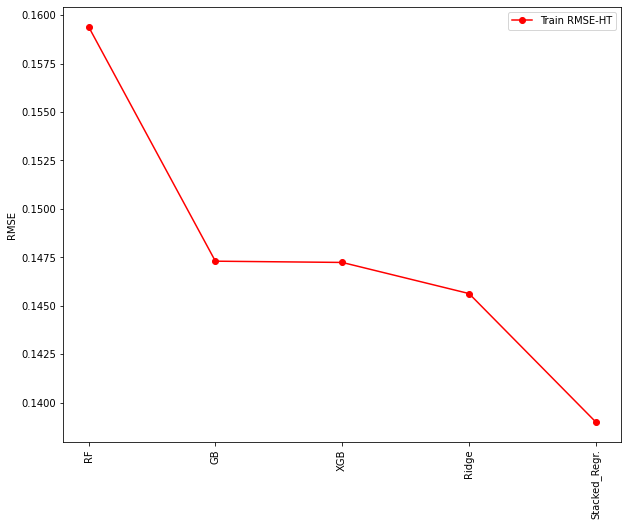

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(HT_results['Train_RMSE_HT'],'ro-',label = 'Train RMSE-HT')
plt.xticks([0,1,2,3,4],labels = ['RF','GB','XGB','Ridge','Stacked_Regr.'])
#plt.plot(train_rmse,'g-',label = 'Train RMSE')
plt.xticks(rotation = 90)
plt.ylabel('RMSE')
plt.legend()

# SUBMISSION FILE

In [ ]:
stacked_model.fit(xtrain, ytrain)

ypred = np.expm1(stacked_model.predict(df2))



submission = pd.DataFrame({'Id': df2['Id'],
                       'SalePrice': ypred})


[19:23:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:23:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
display(submission.head())
submission.to_csv('submission_stacked.csv', index=False)

,Id,SalePrice
0,1461,117585.212843
1,1462,156859.746340
2,1463,179084.567324
3,1464,189018.780805
4,1465,193843.425568


In [ ]:
files.download('submission_stacked.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>